In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

# Define your desired path
data_path = '/content/drive/My Drive/HackathonJune2025/12may'

# Change the current working directory to the new path
os.chdir(data_path)

# Verify the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/My Drive/HackathonJune2025/12may


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear
from sklearn.preprocessing import PolynomialFeatures
from tqdm.notebook import tqdm

In [ ]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Regression

In [ ]:
weight = data['weight'].values
bp = data['ap_hi'].values #blood_pressure

In [ ]:
weight, bp

(array([ 62.,  85.,  64., ..., 105.,  72.,  72.]),
 array([110, 140, 130, ..., 180, 135, 120]))

In [ ]:
#here we are going to create dataset, tabular data, number of samples and of features
n_samples = 2 #12
n_samples_test = 2
X_train = np.expand_dims(weight[:n_samples],axis=-1) #creating the second dim expected by sklearn
Y_train = bp[:n_samples] #labels
X_test = np.expand_dims(weight[n_samples:n_samples+n_samples_test],axis=-1) #creating the second dim expected by sklearn
Y_test = bp[n_samples:n_samples + n_samples_test]
X_train, Y_train, X_test, Y_test

(array([[62.],
        [85.],
        [64.],
        [82.],
        [56.],
        [67.],
        [93.],
        [95.],
        [71.],
        [68.],
        [80.],
        [60.]]),
 array([110, 140, 130, 150, 100, 120, 130, 130, 110, 110, 120, 120]),
 array([[60.],
        [78.]]),
 array([120, 110]))

In [ ]:
deg = 2 #to find the straight line for this first example
poly_features = PolynomialFeatures(degree=deg) #take dataset and create all features of degree 1 2 3 and returns new dataset with the additional features
X_poly = poly_features.fit_transform(X_train) #the weight feature

In [ ]:
X_poly.shape #here weight, intercept (w1*weight + w0)

(12, 9)

In [ ]:
X_poly

array([[1.00000000e+00, 6.20000000e+01, 3.84400000e+03, 2.38328000e+05,
        1.47763360e+07, 9.16132832e+08, 5.68002356e+10, 3.52161461e+12,
        2.18340106e+14],
       [1.00000000e+00, 8.50000000e+01, 7.22500000e+03, 6.14125000e+05,
        5.22006250e+07, 4.43705312e+09, 3.77149516e+11, 3.20577088e+13,
        2.72490525e+15],
       [1.00000000e+00, 6.40000000e+01, 4.09600000e+03, 2.62144000e+05,
        1.67772160e+07, 1.07374182e+09, 6.87194767e+10, 4.39804651e+12,
        2.81474977e+14],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, 5.51368000e+05,
        4.52121760e+07, 3.70739843e+09, 3.04006671e+11, 2.49285471e+13,
        2.04414086e+15],
       [1.00000000e+00, 5.60000000e+01, 3.13600000e+03, 1.75616000e+05,
        9.83449600e+06, 5.50731776e+08, 3.08409795e+10, 1.72709485e+12,
        9.67173116e+13],
       [1.00000000e+00, 6.70000000e+01, 4.48900000e+03, 3.00763000e+05,
        2.01511210e+07, 1.35012511e+09, 9.04583822e+10, 6.06071161e+12,
        4.0

In [ ]:
model = linear.LinearRegression()
model.fit(X_poly,Y_train)

LinearRegression()

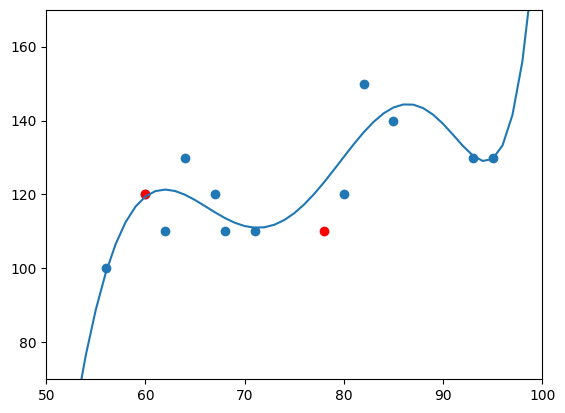

In [ ]:
x = np.arange(50,101)
y = model.intercept_
for i in range(len(model.coef_)):
    y += model.coef_[i]*x**(i)
plt.plot(x, y)
plt.scatter(X_train, Y_train)
plt.xlim(50,100)
plt.ylim(70,170)
plt.scatter(X_test, Y_test, c='r')

## How to use validation set to tune hyperparameters

In [ ]:
#let's take more sample now, very big dataset
n_samples_train = 2000
n_samples_val = 500
n_samples_test = 500
X_train = np.expand_dims(weight[:n_samples_train],axis=-1)
Y_train = bp[:n_samples_train]
X_val = np.expand_dims(weight[n_samples_train:n_samples_train+n_samples_val],axis=-1)
Y_val = bp[n_samples_train:n_samples_train + n_samples_val]
X_test = np.expand_dims(weight[n_samples_train+n_samples_val:n_samples_train+n_samples_val+n_samples_test],axis=-1)
Y_test = bp[n_samples_train+n_samples_val:n_samples_train+n_samples_val+n_samples_test]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((2000, 1), (2000,), (500, 1), (500,), (500, 1), (500,))

In [ ]:
degrees = [3,4,5,6,7,8]
reg_factors = [0.001,0.0001,0.00001]
best_score = -np.inf

#which hyperparameters are we going to tune: degree of pol and regularization
#factor (we are using a regularized version of lin reg, ridge. ridge need a coefficient of how much we regularize)
for deg in degrees: #we iterate on all the possible combination, and we look score on the evaluation set
    for reg in reg_factors:
        poly_features = PolynomialFeatures(degree=deg)
        X_train_poly = poly_features.fit_transform(X_train)
        X_val_poly = poly_features.fit_transform(X_val)
        model = linear.Ridge(alpha=reg)
        model.fit(X_train_poly,Y_train)
        score = model.score(X_val_poly,Y_val)
        if score > best_score:
            best_score = score
            best_deg = deg
            best_reg = reg

best_score, best_deg, best_reg #we see the best score obtained with the best combination of deg and reg factor

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.67873e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.634e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

(0.006830864961427374, 6, 1e-05)